In [ ]:
#Description: This program uses Fibonacci Retracement Levels and MACD to indicate when to buy and sell stock.

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the data
from google.colab import files
files.upload()

Saving AAPL.csv to AAPL.csv


{'AAPL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2017-04-20,141.220001,142.919998,141.160004,142.440002,135.966064,23319600\n2017-04-21,142.440002,142.679993,141.850006,142.270004,135.803802,17320900\n2017-04-24,143.500000,143.949997,143.179993,143.639999,137.111542,17134300\n2017-04-25,143.910004,144.899994,143.869995,144.529999,137.961105,18871500\n2017-04-26,144.470001,144.600006,143.380005,143.679993,137.149704,20041200\n2017-04-27,143.919998,144.160004,143.309998,143.789993,137.254684,14246300\n2017-04-28,144.089996,144.300003,143.270004,143.649994,137.121063,20860400\n2017-05-01,145.100006,147.199997,144.960007,146.580002,139.917923,33602900\n2017-05-02,147.539993,148.089996,146.839996,147.509995,140.805634,45352200\n2017-05-03,145.589996,147.490005,144.270004,147.059998,140.376114,45697000\n2017-05-04,146.520004,147.139999,145.809998,146.529999,139.870178,23371900\n2017-05-05,146.759995,148.979996,146.759995,148.960007,142.189713,27327700\n2017-05-08,149.029999,153.6999

In [4]:
#Get and show the data
df = pd.read_csv('AAPL.csv')
#Set the date as the index 
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2017-04-20,2017-04-20,141.220001,142.919998,141.160004,142.440002,135.966064,23319600
2017-04-21,2017-04-21,142.440002,142.679993,141.850006,142.270004,135.803802,17320900
2017-04-24,2017-04-24,143.500000,143.949997,143.179993,143.639999,137.111542,17134300
2017-04-25,2017-04-25,143.910004,144.899994,143.869995,144.529999,137.961105,18871500
2017-04-26,2017-04-26,144.470001,144.600006,143.380005,143.679993,137.149704,20041200
...,...,...,...,...,...,...,...
2017-08-18,2017-08-18,157.860001,159.500000,156.720001,157.500000,151.554993,27428100
2017-08-21,2017-08-21,157.500000,157.889999,155.110001,157.210007,151.275925,26368500
2017-08-22,2017-08-22,158.229996,160.000000,158.020004,159.779999,153.748917,21604600
2017-08-23,2017-08-23,159.070007,160.470001,158.880005,159.979996,153.941330,19399100


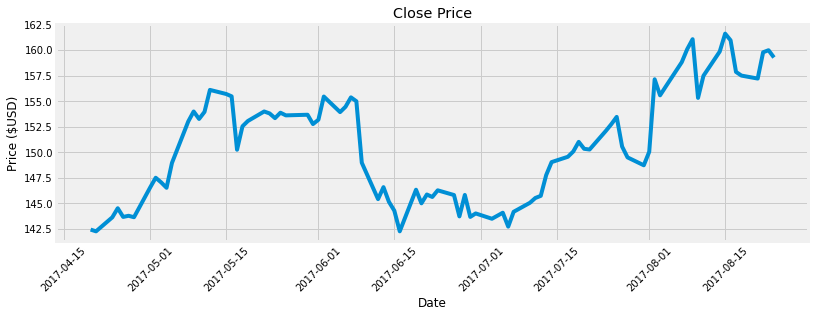

In [5]:
#Plot the data 
plt.figure(figsize=(12,4))
plt.plot(df.Close)
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price ($USD)')
plt.xticks(rotation=45)
plt.show()

In [6]:
#Calculate the Fibonacci Retracement Levels
max_price = df['Close'].max()
min_price = df['Close'].min()

difference = max_price - min_price
first_level = max_price - difference * 0.236
second_level = max_price - difference * 0.382
third_level = max_price - difference * 0.5
fourth_level = max_price - difference * 0.618

In [7]:
#Calculate the MACD Line and the Signal Line indicators
#Calculate the Short Term Exponential Moving Average
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
#Calculate the Long Term Exponential Moving Average
LongEMA = df.Close.ewm(span=26, adjust= False).mean()
#Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
#Calculate the Signal Line
signal = MACD.ewm(span=9, adjust =False).mean()

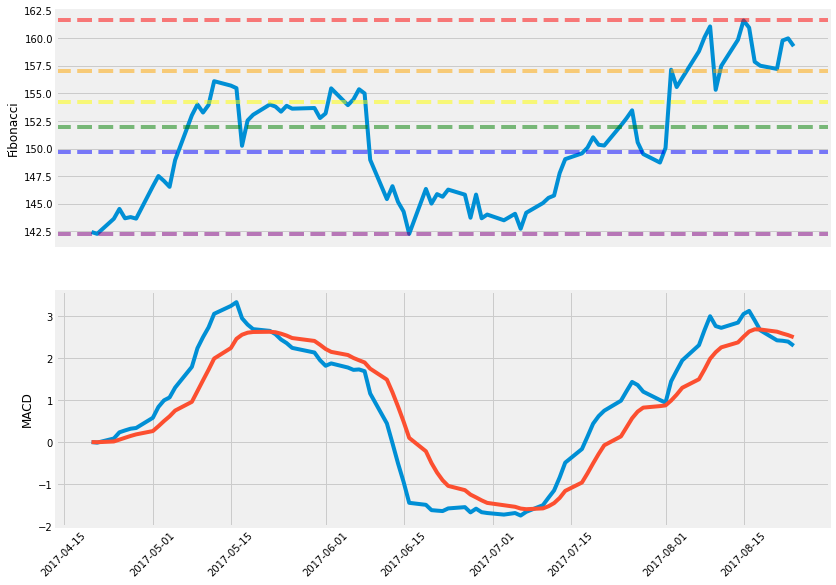

In [10]:
#Plot the Fibonacci Levels along with the close price and the MACD and Signal Line
new_df = df

#plot the Fibonacci Levels
plt.figure(figsize=(12.33, 9.5))
plt.subplot(2,1,1)
plt.plot(new_df.index, new_df['Close'])
plt.axhline(max_price, linestyle= '--', alpha=0.5, color='red')
plt.axhline(first_level, linestyle= '--', alpha=0.5, color='orange')
plt.axhline(second_level, linestyle= '--', alpha=0.5, color='yellow')
plt.axhline(third_level, linestyle= '--', alpha=0.5, color='green')
plt.axhline(fourth_level, linestyle= '--', alpha=0.5, color='blue')
plt.axhline(min_price, linestyle= '--', alpha=0.5, color='purple')
plt.ylabel('Fibonacci')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

#Plot the MACD Line and the Signal Line
plt.subplot(2,1,2)
plt.plot(new_df.index, MACD)
plt.plot(new_df.index, signal)
plt.ylabel('MACD')
plt.xticks(rotation=45)

plt.savefig('Fig1.png')

In [11]:
#Create new columns for the data frame
df['MACD'] = MACD
df['Signal Line'] = signal
#Show the new data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2017-04-20,2017-04-20,141.220001,142.919998,141.160004,142.440002,135.966064,23319600,0.000000,0.000000
2017-04-21,2017-04-21,142.440002,142.679993,141.850006,142.270004,135.803802,17320900,-0.013561,-0.002712
2017-04-24,2017-04-24,143.500000,143.949997,143.179993,143.639999,137.111542,17134300,0.085256,0.014881
2017-04-25,2017-04-25,143.910004,144.899994,143.869995,144.529999,137.961105,18871500,0.232702,0.058446
2017-04-26,2017-04-26,144.470001,144.600006,143.380005,143.679993,137.149704,20041200,0.277764,0.102309
...,...,...,...,...,...,...,...,...,...
2017-08-18,2017-08-18,157.860001,159.500000,156.720001,157.500000,151.554993,27428100,2.665304,2.683710
2017-08-21,2017-08-21,157.500000,157.889999,155.110001,157.210007,151.275925,26368500,2.425725,2.632113
2017-08-22,2017-08-22,158.229996,160.000000,158.020004,159.779999,153.748917,21604600,2.415390,2.588769
2017-08-23,2017-08-23,159.070007,160.470001,158.880005,159.979996,153.941330,19399100,2.395722,2.550159


In [12]:
#Create a function to be used in our strategy to get the upper Fibonacci Level and the Lower Fibonacci Level of the current price.
def getLevels(price):
  if price >= first_level:
    return (max_price, first_level)
  elif price >= second_level:
    return (first_level, second_level)
  elif price >= third_level:
    return (second_level, third_level)
  elif price >= fourth_level:
    return (third_level, fourth_level)
  else:
    return (fourth_level, min_price)

In [13]:
#Create a function for the trading strategy

#The Strategy
#If the signal line crosses above the MACD Line and the current price crossed above or below the last Fibonacci Level then buy
#If the signal line crosses below the MACD Line and the current price crossed above or below the last Fibonacci Level then sell
#Never sell at a price that's lower then I bought

def strategy(df):
  buy_list =[]
  sell_list=[]
  flag = 0 
  last_buy_price = 0

  #Loop through the data set
  for i in range(0, df.shape[0]):
    price = df['Close'][i]
    #If this is the first data point within the data set, then get the level above and below it. 
    if i == 0:
      upper_lvl, lower_lvl = getLevels(price)
      buy_list.append(np.nan)
      sell_list.append(np.nan)
    #Else if the current price is greater than or equal to the upper_lvl, or less than or equal to the lower_lvl, then we know the price has 'hit' or crossed a new Fibonacci Level
    elif price >= upper_lvl or price <= lower_lvl:

      #Check to see if the MACD line crossed above or below the signal line
      if df['Signal Line'][i] > df['MACD'][i] and flag == 0:
        last_buy_price = price
        buy_list.append(price)
        sell_list.append(np.nan)
        #Set the flag to 1 to signal that the share was bought
        flag = 1
      elif df['Signal Line'][i] < df['MACD'][i] and flag == 1 and price >= last_buy_price:
        buy_list.append(np.nan)
        sell_list.append(price)
        #Set the flag to 0 to signal that the share was sold
        flag = 0
      else:
        buy_list.append(np.nan)
        sell_list.append(np.nan)
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

    #Update the new levels
    upper_lvl, lower_lvl = getLevels(price)

  return buy_list, sell_list


In [14]:
#Create buy and sell columns
buy, sell = strategy(df)
df['Buy_Signal_Price'] = buy
df['Sell_Signal_Price'] = sell 
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2017-04-20,2017-04-20,141.220001,142.919998,141.160004,142.440002,135.966064,23319600,0.000000,0.000000,NaN,NaN
2017-04-21,2017-04-21,142.440002,142.679993,141.850006,142.270004,135.803802,17320900,-0.013561,-0.002712,142.270004,NaN
2017-04-24,2017-04-24,143.500000,143.949997,143.179993,143.639999,137.111542,17134300,0.085256,0.014881,NaN,NaN
2017-04-25,2017-04-25,143.910004,144.899994,143.869995,144.529999,137.961105,18871500,0.232702,0.058446,NaN,NaN
2017-04-26,2017-04-26,144.470001,144.600006,143.380005,143.679993,137.149704,20041200,0.277764,0.102309,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-18,2017-08-18,157.860001,159.500000,156.720001,157.500000,151.554993,27428100,2.665304,2.683710,NaN,NaN
2017-08-21,2017-08-21,157.500000,157.889999,155.110001,157.210007,151.275925,26368500,2.425725,2.632113,NaN,NaN
2017-08-22,2017-08-22,158.229996,160.000000,158.020004,159.779999,153.748917,21604600,2.415390,2.588769,NaN,NaN
2017-08-23,2017-08-23,159.070007,160.470001,158.880005,159.979996,153.941330,19399100,2.395722,2.550159,NaN,NaN


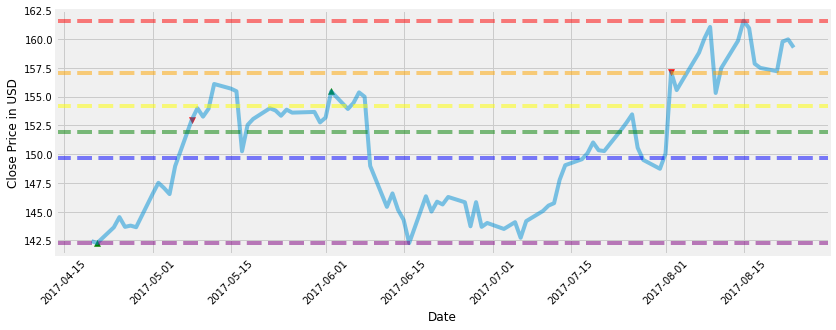

In [17]:
#Plot the Fibonacci Levels along with the close price and with the Buy and Sell signals
new_df = df

#plot the Fibonacci Levels
plt.figure(figsize=(12.33, 4.5))
plt.plot(new_df.index, new_df['Close'], alpha=0.5)
plt.scatter(new_df.index, new_df['Buy_Signal_Price'], color='green', marker='^', alpha=1)
plt.scatter(new_df.index, new_df['Sell_Signal_Price'], color='red', marker='v', alpha=1)
plt.axhline(max_price, linestyle= '--', alpha=0.5, color='red')
plt.axhline(first_level, linestyle= '--', alpha=0.5, color='orange')
plt.axhline(second_level, linestyle= '--', alpha=0.5, color='yellow')
plt.axhline(third_level, linestyle= '--', alpha=0.5, color='green')
plt.axhline(fourth_level, linestyle= '--', alpha=0.5, color='blue')
plt.axhline(min_price, linestyle= '--', alpha=0.5, color='purple')
plt.ylabel('Close Price in USD')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()